# Optimal Data Sampling Strategy (Single Task)

[ 0.49671415 -0.1382643   0.64768854  1.52302986]
[-0.23413696  1.57921282  0.76743473 -0.46947439]
[-0.46341769 -0.46572975  0.24196227 -1.91328024]
[-0.56228753 -1.01283112  0.31424733 -0.90802408]
[ 1.46564877 -0.2257763   0.0675282  -1.42474819]
[ 0.11092259 -1.15099358  0.37569802 -0.60063869]
[-0.60170661  1.85227818 -0.01349722 -1.05771093]
[-1.22084365  0.2088636  -1.95967012 -1.32818605]
[ 0.73846658  0.17136828 -0.11564828 -0.3011037 ]
[-0.71984421 -0.46063877  1.05712223  0.34361829]
[ 0.32408397 -0.38508228 -0.676922    0.61167629]
[ 0.93128012 -0.83921752 -0.30921238  0.33126343]
[-0.47917424 -0.18565898 -1.10633497 -1.19620662]
[ 1.35624003 -0.07201012  1.0035329   0.36163603]
[ 0.36139561  1.53803657 -0.03582604  1.56464366]
[ 0.8219025   0.08704707 -0.29900735  0.09176078]
[-0.21967189  0.35711257  1.47789404 -0.51827022]
[-0.50175704  0.91540212  0.32875111 -0.5297602 ]
[ 0.09707755  0.96864499 -0.70205309 -0.32766215]
[-1.46351495  0.29612028  0.26105527  0.00511346]


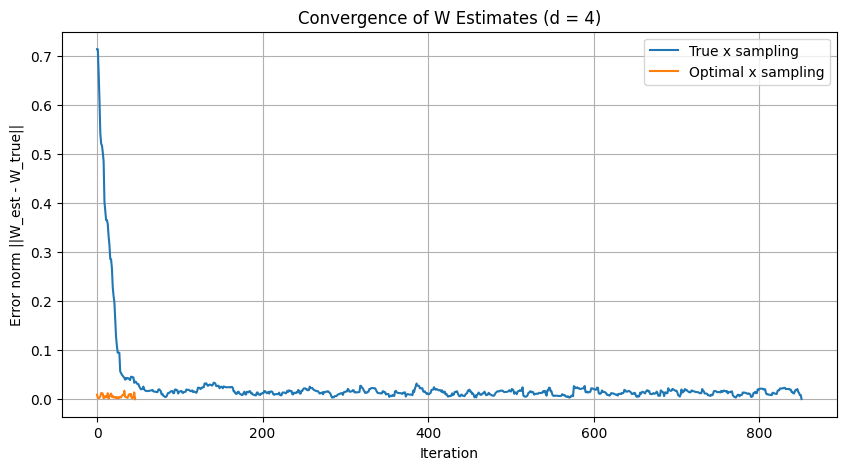

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_sgd_vs_optimal( W_true, sigma_y=0.1, u_x=None, sigma_x=1.0, eta=0.1, tol=1e-3, max_iter=10000, seed=42, plot=True):
  np.random.seed(seed)
  d = len(W_true)
  if u_x is None:
    u_x = np.zeros(d)

  # Simulation 1: Sampling x from the true distribution
  W_est_true = np.zeros(d)
  errors_true = []
  iters_true = 0

  for t in range(max_iter):
      x = np.random.normal(u_x, sigma_x)
      print(x)
      epsilon = np.random.normal(0, sigma_y)
      update = eta * (np.dot(W_true - W_est_true, x) + epsilon) * x
      W_est_true += update
      err = np.linalg.norm(W_est_true - W_true)
      errors_true.append(err)
      iters_true += 1
      if err < tol:
          break

  # Simulation 2: Sampling x using optimal design
  W_est_opt = np.zeros(d)
  errors_opt = []
  iters_opt = 0

  betas = []
  delta_sq_vals = []

  for t in range(max_iter):
      Delta = W_est_opt - W_true
      norm_Delta = np.linalg.norm(Delta)
      if norm_Delta < tol:
          break
      if 2 * (norm_Delta**2) > eta * (sigma_y**2):
          # Update rule: W_{t+1} = W_t + eta * ( (W_true - W_est_opt)*x_opt + epsilon ) * x_opt
          beta = np.sqrt((2 * norm_Delta**2 - eta * sigma_y**2) / (2 * eta * norm_Delta**4))
          x_opt = beta * Delta
          betas.append(beta)
          delta_sq_vals.append(norm_Delta**2)
      else:
          x_opt = np.random.normal(u_x, sigma_x, size=d)
          betas.append(None)  # mark as fallback
          delta_sq_vals.append(norm_Delta**2)

      epsilon = np.random.normal(0, sigma_y)
      update = eta * (np.dot(-Delta, x_opt) + epsilon) * x_opt
      W_est_opt += update
      err = np.linalg.norm(W_est_opt - W_true)
      errors_opt.append(err)
      iters_opt += 1

  # Reporting
  print("Simulation 1 (x sampled from true distribution):")
  print(f"  Final estimate W = {W_est_true}")
  print(f"  Convergence error = {np.linalg.norm(W_est_true - W_true):.6f}")
  print(f"  Number of iterations = {iters_true}")

  print("\nSimulation 2 (Optimal x design):")
  print(f"  Final estimate W = {W_est_opt}")
  print(f"  Convergence error = {np.linalg.norm(W_est_opt - W_true):.6f}")
  print(f"  Number of iterations = {iters_opt}")

  # Plotting
  if plot:
      plt.figure(figsize=(10, 5))
      plt.plot(errors_true, label="True x sampling")
      plt.plot(errors_opt, label="Optimal x sampling")
      plt.xlabel("Iteration")
      plt.ylabel("Error norm ||W_est - W_true||")
      plt.title(f"Convergence of W Estimates (d = {d})")
      plt.legend()
      plt.grid(True)
      plt.show()

  return {
      "W_est_true": W_est_true,
      "W_est_opt": W_est_opt,
      "errors_true": errors_true,
      "errors_opt": errors_opt,
      "iters_true": iters_true,
      "iters_opt": iters_opt
  }

W_true = np.array([0.5, 0.3, -0.4, 0.1])
W_est_true, W_est_opt, errors_true, errors_opt, iters_true, iters_opt = simulate_sgd_vs_optimal(W_true=W_true, sigma_y=0.03, sigma_x=1.0, eta=0.1, tol=1e-3, max_iter=10000)



# Optimal Data Sampling Strategy (Single Task): Estimating with gradient (Batch Gradient Descent)

Stop condition based on gradient norm rather than Delta (We don't want to use True W during training)

Simulation 1 (x sampled from true distribution):
  Final estimate W = [ 2.00016179  3.00080111  0.99995685 -8.00061365]
  Convergence error = 0.001023
  Number of iterations = 108

Simulation 2 (Optimal x design):
  Final estimate W = [ 2.03985439  3.02624421  0.96903285 -8.02805691]
  Convergence error = 0.063429
  Number of iterations = 19


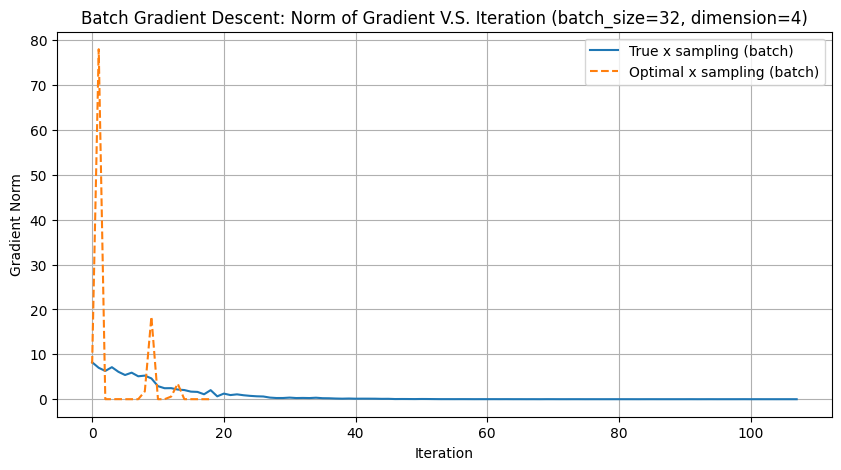

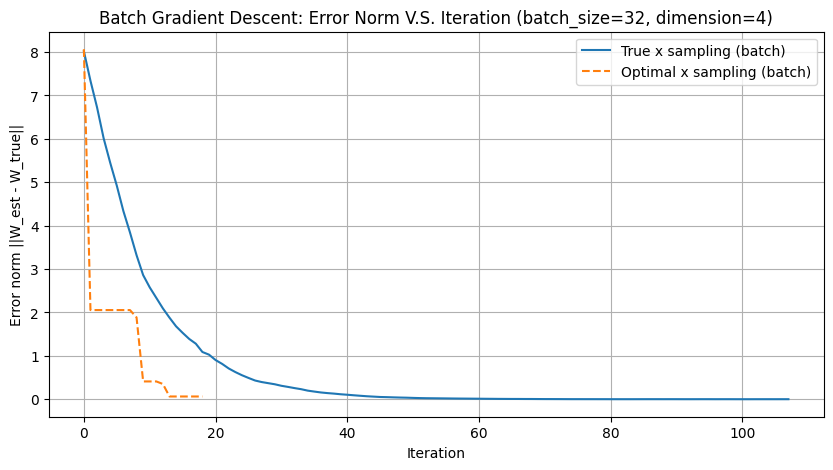

[np.float64(7.917462244763765), np.float64(77.98583096512189), np.float64(0.007967724155631946), np.float64(0.00935693123192347), np.float64(0.017175016377103502), np.float64(0.004091514717630035), np.float64(0.002302696410571539), np.float64(0.001175046981339751), np.float64(1.7440748077682715), np.float64(18.386450308883315), np.float64(0.00661931021658233), np.float64(0.0015727264989060237), np.float64(0.5906182011606073), np.float64(3.463527527040593), np.float64(0.011438525572016602), np.float64(0.011334426897725297), np.float64(0.006793620907662798), np.float64(0.005842087742278974), np.float64(0.00030128017528628886)]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_sgd_vs_optimal( W_true, sigma_y=0.1, u_x=None, sigma_x=1.0, eta=0.1, tol=1e-3, max_iter=10000, batch_size=16, seed=42, plot=True ):
  np.random.seed(seed)
  d = len(W_true)
  if u_x is None:
    u_x = np.zeros(d)
  # --- Simulation 1: True x sampling with batch gradient descent ---
  W_est_true = np.zeros(d)
  errors_true = []
  norm_grad_list = []
  iters_true = 0

  for t in range(max_iter):
      X = np.random.normal(loc=u_x, scale=sigma_x, size=(batch_size, d))
      epsilons = np.random.normal(0, sigma_y, size=batch_size)

      grads = np.array([
          (np.dot(W_true - W_est_true, x) + e) * x
          for x, e in zip(X, epsilons)
      ])
      avg_grad = grads.mean(axis=0)
      W_est_true += eta * avg_grad

      err = np.linalg.norm(W_est_true - W_true)
      errors_true.append(err)
      iters_true += 1

      gradient = - avg_grad
      norm_gradient = np.linalg.norm(gradient)
      norm_grad_list.append(norm_gradient)
      # This break conidition is based on the norm of the gradient
      if norm_gradient < tol:
          break

  # --- Simulation 2: Optimal x sampling with batch gradient descent ---
  W_est_opt = np.zeros(d)
  errors_opt = []
  norm_grad_opt_list = []
  iters_opt = 0
  gradient = None

  for t in range(max_iter):
      norm_gradient = np.linalg.norm(gradient) if gradient is not None else float("inf")

      if gradient is not None:
          norm_grad_opt_list.append(norm_gradient)
      # This break conidition is based on the norm of the gradient
      if norm_gradient < tol:
          break

      X_opt = []
      epsilons = np.random.normal(0, sigma_y, size=batch_size)

      for _ in range(batch_size):
          if gradient is None or 2 * norm_gradient**2 < eta * sigma_y**2:
              x_opt = np.random.normal(u_x, sigma_x, size=d)
          else:
              beta = np.sqrt((2 * norm_gradient**2 - eta * sigma_y**2) / (2 * eta * norm_gradient**4))
              x_opt = beta * gradient
          X_opt.append(x_opt)


      X_opt = np.array(X_opt)
      grads = np.array([
          (np.dot(W_true - W_est_opt, x) + e) * x
          for x, e in zip(X_opt, epsilons)
      ])
      avg_grad = grads.mean(axis=0)
      gradient = -avg_grad  # Store for next iteration
      W_est_opt += eta * avg_grad

      err = np.linalg.norm(W_est_opt - W_true)
      errors_opt.append(err)
      iters_opt += 1

  # --- Reporting ---
  print("Simulation 1 (x sampled from true distribution):")
  print(f"  Final estimate W = {W_est_true}")
  print(f"  Convergence error = {np.linalg.norm(W_est_true - W_true):.6f}")
  print(f"  Number of iterations = {iters_true}")

  print("\nSimulation 2 (Optimal x design):")
  print(f"  Final estimate W = {W_est_opt}")
  print(f"  Convergence error = {np.linalg.norm(W_est_opt - W_true):.6f}")
  print(f"  Number of iterations = {iters_opt}")

  # --- Plotting ---
  if plot:
      plt.figure(figsize=(10, 5))
      plt.plot(norm_grad_list, label="True x sampling (batch)")
      plt.plot(norm_grad_opt_list, label="Optimal x sampling (batch)", linestyle='--')
      plt.xlabel("Iteration")
      plt.ylabel("Gradient Norm")
      plt.title(f"Batch Gradient Descent: Norm of Gradient V.S. Iteration (batch_size={batch_size}, dimension={d})")
      plt.legend()
      plt.grid(True)
      plt.show()

      plt.figure(figsize=(10, 5))
      plt.plot(errors_true, label="True x sampling (batch)")
      plt.plot(errors_opt, label="Optimal x sampling (batch)", linestyle='--')
      plt.xlabel("Iteration")
      plt.ylabel("Error norm ||W_est - W_true||")
      plt.title(f"Batch Gradient Descent: Error Norm V.S. Iteration (batch_size={batch_size}, dimension={d})")
      plt.legend()
      plt.grid(True)
      plt.show()
      print(norm_grad_opt_list)

  return {
      "W_est_true": W_est_true,
      "W_est_opt": W_est_opt,
      "errors_true": errors_true,
      "errors_opt": errors_opt,
      "iters_true": iters_true,
      "iters_opt": iters_opt
  }

# Example
W_true = np.array([2.0, 3.0, 1.0, -8.0])
W_est_true, W_est_opt, errors_true, errors_opt, iters_true, iters_opt = simulate_sgd_vs_optimal(W_true=W_true, sigma_y=0.01, sigma_x=1.0, eta=0.1, tol=1e-3, max_iter=10000, batch_size=32, seed=42)


# Meta Learning Scenario: Finding the Optimal Prior Mean

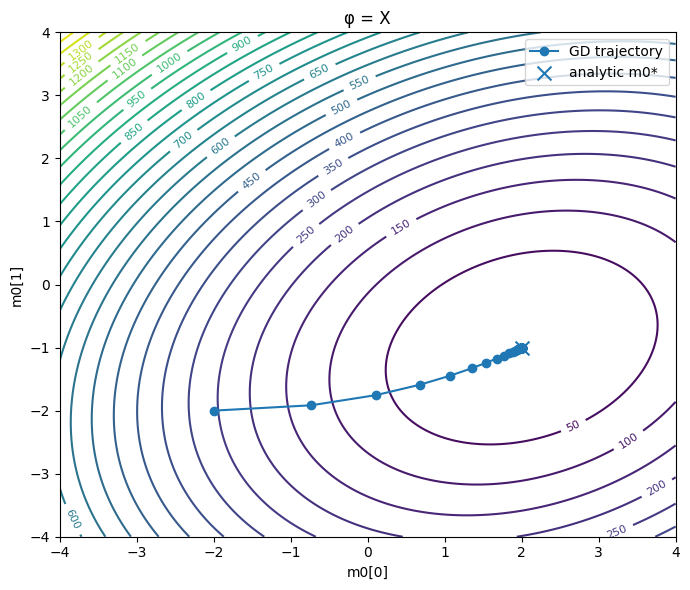

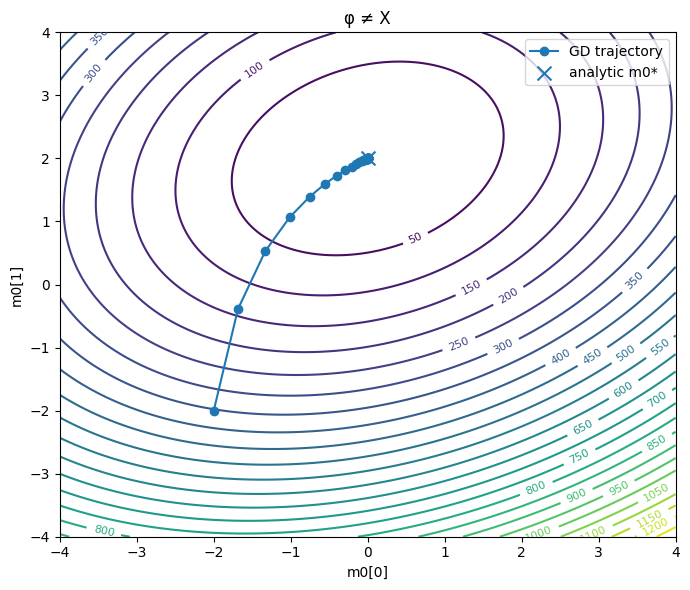

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Dimensions
n, p = 50, 2

# Sample design matrix X
X = np.random.randn(n, p)

# True latent weight vector w (and its prior mean mu_w)
mu_w = np.array([2.0, -1.0])
w = mu_w.copy()

# Two phi mappings
phi_x1 = X.copy()                  # phi = X
A = np.array([[0.5,1],[1.5,1]])        # random linear transformation
phi_x2 = X @ A                   # new basis for X

# Analytic solution for m0*
def analytic_m0(X, phi_x, w):
    return np.linalg.solve(X.T @ X, X.T @ (phi_x @ w))

m0_star1 = analytic_m0(X, phi_x1, w)
m0_star2 = analytic_m0(X, phi_x2, w)

# Loss and gradient
def J(m0, X, phi_x, w):
    diff = X @ m0 - phi_x @ w
    return 0.5 * np.dot(diff, diff)

def grad_J(m0, X, phi_x, w):
    return X.T @ (X @ m0 - phi_x @ w)

# Grid for contour
grid_vals = np.linspace(-4, 4, 200)
M0_1, M0_2 = np.meshgrid(grid_vals, grid_vals)

J_vals1 = np.empty_like(M0_1)
J_vals2 = np.empty_like(M0_1)
for i in range(M0_1.shape[0]):
    for j in range(M0_1.shape[1]):
        m0 = np.array([M0_1[i, j], M0_2[i, j]])
        J_vals1[i, j] = J(m0, X, phi_x1, w)
        J_vals2[i, j] = J(m0, X, phi_x2, w)

# Gradient descent trajectories
def compute_gd_path(phi_x, m0_start, alpha=0.01, iters=50):
    path = []
    m0 = m0_start.copy()
    for _ in range(iters):
        path.append(m0.copy())
        m0 = m0 - alpha * grad_J(m0, X, phi_x, w)
    return np.array(path)

start = np.array([-2.0, -2.0])
path1 = compute_gd_path(phi_x1, start)
path2 = compute_gd_path(phi_x2, start)

# Plot 1: phi = X
plt.figure(figsize=(7, 6))
cs1 = plt.contour(M0_1, M0_2, J_vals1, levels=30)
plt.clabel(cs1, inline=1, fontsize=8)
plt.plot(path1[:, 0], path1[:, 1], '-o', label='GD trajectory')
plt.scatter(m0_star1[0], m0_star1[1], marker='x', s=100, label='analytic m0*')
plt.title('φ = X')
plt.xlabel('m0[0]')
plt.ylabel('m0[1]')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: phi ≠ X
plt.figure(figsize=(7, 6))
cs2 = plt.contour(M0_1, M0_2, J_vals2, levels=30)
plt.clabel(cs2, inline=1, fontsize=8)
plt.plot(path2[:, 0], path2[:, 1], '-o', label='GD trajectory')
plt.scatter(m0_star2[0], m0_star2[1], marker='x', s=100, label='analytic m0*')
plt.title('φ ≠ X')
plt.xlabel('m0[0]')
plt.ylabel('m0[1]')
plt.legend()
plt.tight_layout()
plt.show()
